# Carga de información

## Importando librerias

A través del comando [import **modulo** as **alias**] se logra traer al proyecto módulos que permiten manipular bases de datos y hacer gráficas de manera eficiente.


In [49]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from plotly import express as px
import plotly.graph_objects as go
import numpy as np 
plt.style.use('seaborn') # Para asignar formato tipo 'seaborn' a las gráficas de matplotlib

## Paleta de colores (seaborn)

Dentro del módulo **seaborn** existe una colección de paletas de colores que pueden aportar mayor estética al proyecto. En este caso se elige la paleta *'flare_r'* la cual es una colección de color entre morado y melón. La paleta se guarda dentro de dos variables llamadas *paleta* y *colors* respectivamente. Así mismo, dentro de la variable *colors2* se almacena otra paleta de colores rojos llamada *Reds* la cual se usará solo para las gráficas de pastel.


In [50]:
paleta = 'flare_r'
colors = sns.color_palette(paleta)
colors2 = sns.color_palette('Reds')

## Carga de la base de datos

A través del modulo *pandas* accedemos a la función *read_csv()* que permite cargar un archivo **.csv** para posteriormente almacenarlo en una variable llamada **df** haciendo referencia a "*DataFrame*"

In [51]:
df = pd.read_csv('../data/synergy_logistics_database.csv', index_col='register_id')
display(df)

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000
...,...,...,...,...,...,...,...,...,...
19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000
19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000
19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000


Se asigna el tipo de dato [datetime] a la columna **date** para que sea más entendible el análisis por fechas en formato correcto. Seguido, abreviamos el nombre de "United Kingdom" a solo "UK" para evitar problemas de formato al momento de trabajar con gráficas.

In [52]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
df.head()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,2015-01-31,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,2015-02-01,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,2015-02-02,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,2015-02-03,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,2015-02-04,Cars,Sea,Honda,17000000


In [53]:
df['destination'].replace({'United Kingdom':'UK'}, inplace = True)

## Análisis exploratorio

El propósito es analizar si la base de datos cuenta con valores nulos o errores en el contenido que comprometan el análisis posterior. A través de la función "*info()*" Python puede hacer una análisis breve de cada una de las columnas en el *df*. Al usar dicha función Python no muestra que haya datos vacíos o corruptos. Por lo que se puede proceder correctamente.


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19056 entries, 1 to 19056
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   direction       19056 non-null  object        
 1   origin          19056 non-null  object        
 2   destination     19056 non-null  object        
 3   year            19056 non-null  int64         
 4   date            19056 non-null  datetime64[ns]
 5   product         19056 non-null  object        
 6   transport_mode  19056 non-null  object        
 7   company_name    19056 non-null  object        
 8   total_value     19056 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.5+ MB


# Rutas mas comerciales

## Filtrado de información para los destinos mas comerciales

Para obtener las rutas más comerciales (es decir, que se reptiten más en la base de datos, o en su defecto, que synergy logistics tiene más interacción) es necesario realizar un conteo de las veces que aparece un país en toda la base de datos. El objetivo es conseguir una lista que contenga pequeñas listas de la forma:

destinos_array = [
    [Destino1, n_veces_aparece],
    [Destino2, n_veces_aparece],
    ...
    [Destino_n, n_veces_aparece]
]


La operación anterior se puede llevar a cabo con el comando: 


- [destino, df[df['destination'] == destino].destination.count()]


Que en general tiene la manera en cómo pandas filtra información en una base de datos (df[df[columna]]) para despues usar la función "*count()*" para conocer cuántos valores tiene la lista resultante del filtrado.

La operación anterior se iterará para cada país existente en la columna 'destination' a través de un bucle *for*. La operación anterior arrojará un valor que posteriormente almacenaremos en una lista junto con el nombre del país correspondiente, resultando la forma:

- [destinos_array.append([country, df[df['destination'] == country].destination.count()]) for country in df['destination'].unique()]


De esa manera se consigue el vector final:

- [['China', 1503], ['USA', 1546], ['South Korea', 415], ..., ['Poland', 177]]


**Realizar filtrado de información a través de este método donde dé cuenta las veces que aparece una palabra en un DataFrame se volverá a usar en los puntos siguientes o incluso con más de una condición. Sin embargo, en escencia es el mismo algoritmo, por lo que solo se mencionará este método de filtrado como "Filtrado en bucle for".**


In [55]:
destinos_array = []
[destinos_array.append([country, df[df['destination'] == country].destination.count()]) for country in df['destination'].unique()]
print(destinos_array)

[['China', 1503], ['USA', 1546], ['South Korea', 415], ['Spain', 632], ['Italy', 422], ['Japan', 1072], ['Germany', 1179], ['Mexico', 1836], ['Brazil', 903], ['France', 893], ['Switzerland', 194], ['UK', 531], ['Croatia', 30], ['Ireland', 162], ['Belgium', 1248], ['Argentina', 393], ['Singapore', 586], ['Canada', 857], ['Netherlands', 699], ['Belorussia', 219], ['Turkey', 80], ['India', 180], ['Vietnam', 497], ['Russia', 295], ['United Arab Emirates', 615], ['Thailand', 1032], ['Philippines', 114], ['Peru', 44], ['Austria', 66], ['New Zealand', 249], ['Rusia', 204], ['Slovakia', 94], ['Malaysia', 89], ['Poland', 177]]


Posteriormente, se usa la función de pandas *DataFrame()* para convertir el vector resultante en un DataFrame. En seguida, se ordena el DataFrame resultante de manera descendente con la función *sort_values()* (en algunos casos se filtran únicamente los 10 primeros valores con la función *iloc()*)

**Esta forma de convertir, ordenar (y en algunos casos filtrar) una lista resultante del filtrado por bucle for se va a repetir para el resto de las operaciones, por lo que solo se hará mención como "convirtiendo a df".**


In [56]:
df_destinos = pd.DataFrame(destinos_array, columns=['País', 'Rating'])
df_destinos.set_index('País', inplace=True)
df_destinos.head()

,Rating
País,
China,1503
USA,1546
South Korea,415
Spain,632
Italy,422


Ordenando la lista de paises mas comerciales

In [57]:
df_destinos.sort_values(by = 'Rating', ascending=False, inplace=True)
df_destinos.head()

,Rating
País,
Mexico,1836
USA,1546
China,1503
Belgium,1248
Germany,1179


## Gráfica 1: Destinos comerciales mas populares

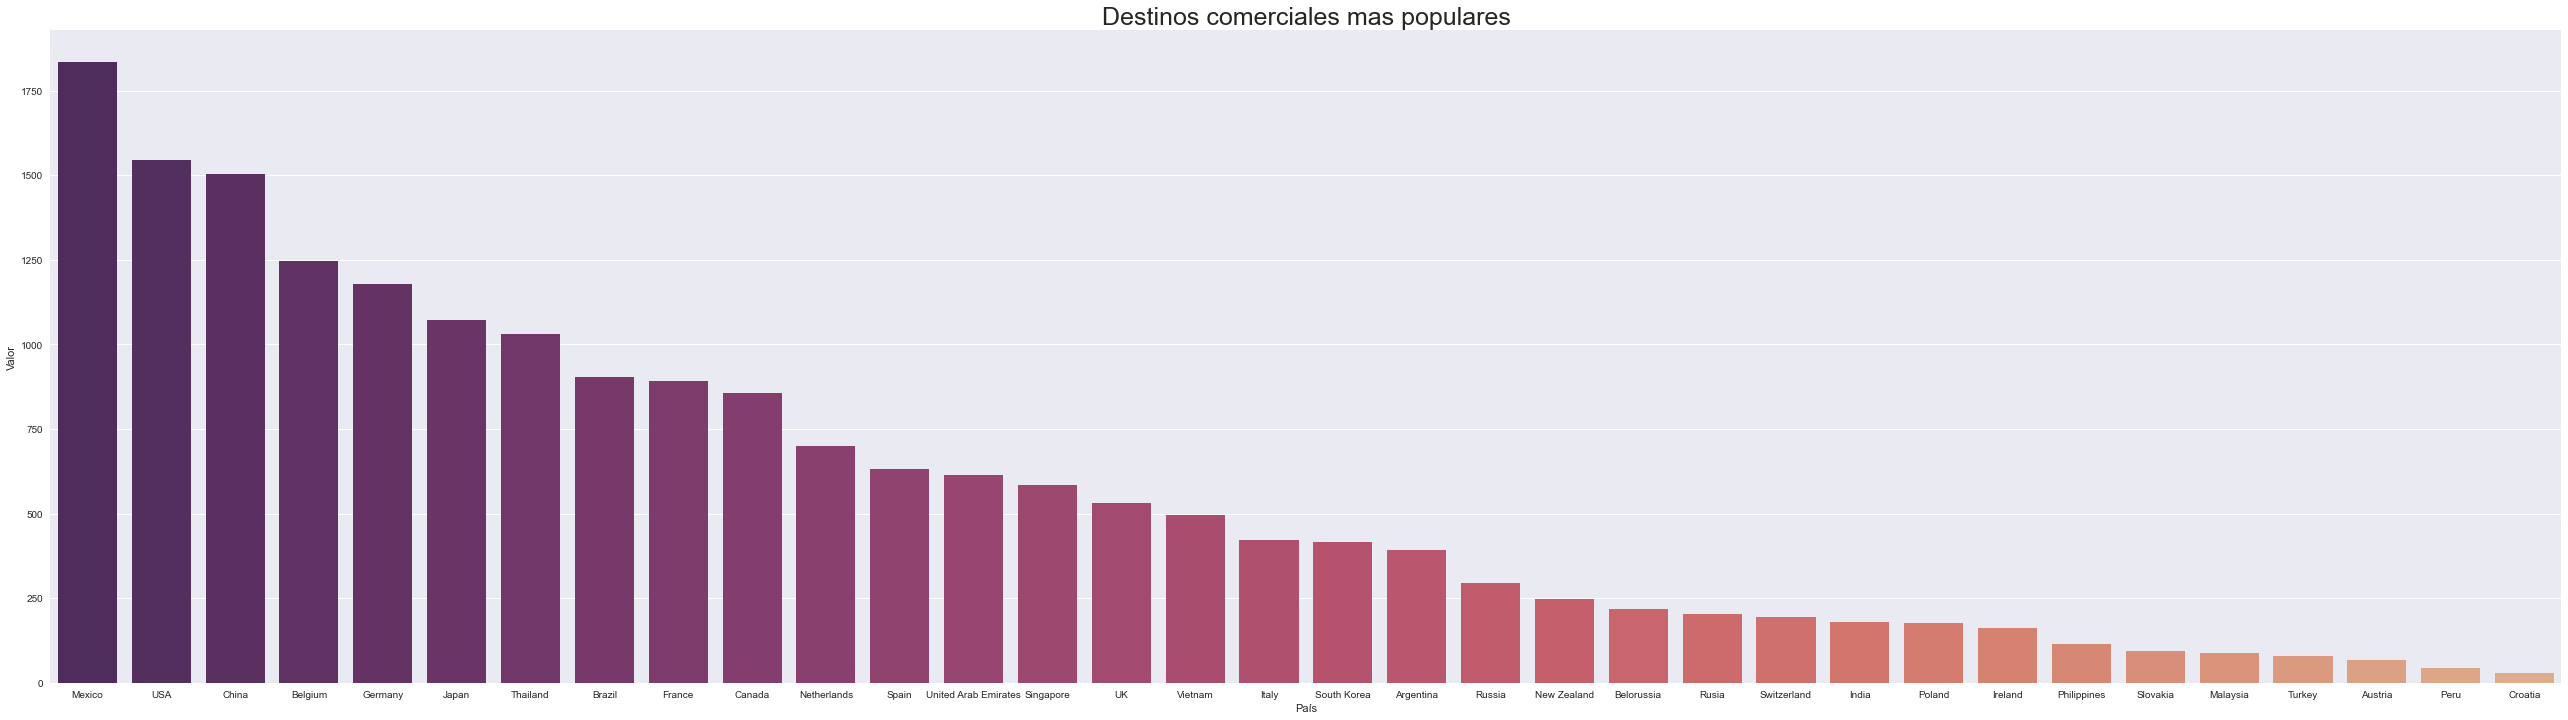

In [58]:
plt.figure(figsize=(45,12))
sns.barplot(
    x = df_destinos.index, 
    y = df_destinos['Rating'],
    palette=paleta
    )
plt.title('Destinos comerciales mas populares', fontdict={'fontsize':25})
plt.xlabel('País')
plt.ylabel('Valor')
plt.show()


La gráfica 1 muestra en orden descendente cada uno de los países más importantes para **Synergy Logistics**, esto significa que México y USA son los países con los que **Synergy Logistics** interactúa con mayor frecuencia. En tercer lugar, esta Bélgica y en cuarto lugar Alemania, dejando a Perú y Croacia en el penúltimo y último lugar respectivamente.

## Filtrado de inromación para destinos por importación y exportación

Inicialmente separamos en dos DataFrame las importaciones y en otro las exportaciones. Posteriormente, aplicamos el mismo método de **filtrado por bucle for** mencionado anteriormente para finalmente transformar las listas resultantes en DataFrame ordenados.

In [59]:
# Filtrado en dos df diferentes
df_Exports = df[df['direction'] == 'Exports']
df_Imports = df[df['direction'] == 'Imports']

In [60]:
# Filtrado por bucle for para el df de exportaciones
exports_array = []
[exports_array.append([country,df_Exports[df_Exports['destination'] == country].destination.count()]) for country in df['destination'].unique()]
print(exports_array)

[['China', 1008], ['USA', 1345], ['South Korea', 415], ['Spain', 632], ['Italy', 422], ['Japan', 658], ['Germany', 824], ['Mexico', 1404], ['Brazil', 903], ['France', 893], ['Switzerland', 194], ['UK', 531], ['Croatia', 30], ['Ireland', 162], ['Belgium', 1248], ['Argentina', 393], ['Singapore', 514], ['Canada', 603], ['Netherlands', 699], ['Belorussia', 219], ['Turkey', 80], ['India', 23], ['Vietnam', 497], ['Russia', 295], ['United Arab Emirates', 356], ['Thailand', 200], ['Philippines', 114], ['Peru', 44], ['Austria', 66], ['New Zealand', 249], ['Rusia', 204], ['Slovakia', 94], ['Malaysia', 89], ['Poland', 0]]


In [61]:
# Filtrado por bucle for para el df de importaciones
imports_array = []
[imports_array.append([country, df_Imports[df_Imports['destination'] == country].destination.count()]) for country in df['destination'].unique()]
print(imports_array)

[['China', 495], ['USA', 201], ['South Korea', 0], ['Spain', 0], ['Italy', 0], ['Japan', 414], ['Germany', 355], ['Mexico', 432], ['Brazil', 0], ['France', 0], ['Switzerland', 0], ['UK', 0], ['Croatia', 0], ['Ireland', 0], ['Belgium', 0], ['Argentina', 0], ['Singapore', 72], ['Canada', 254], ['Netherlands', 0], ['Belorussia', 0], ['Turkey', 0], ['India', 157], ['Vietnam', 0], ['Russia', 0], ['United Arab Emirates', 259], ['Thailand', 832], ['Philippines', 0], ['Peru', 0], ['Austria', 0], ['New Zealand', 0], ['Rusia', 0], ['Slovakia', 0], ['Malaysia', 0], ['Poland', 177]]


In [62]:
# Creación de df para la lista de importaciones
df_Imports_ranking = pd.DataFrame(data = imports_array, columns=['País', 'Raiking'])
df_Imports_ranking.set_index('País', inplace=True)
df_Imports_ranking.head()

,Raiking
País,
China,495
USA,201
South Korea,0
Spain,0
Italy,0


In [63]:
# Creación de df para la lista de exportaciones
df_Exports_ranking = pd.DataFrame(data = exports_array, columns=['País', 'Raiking'])
df_Exports_ranking.set_index('País', inplace=True)
df_Exports_ranking.head()

,Raiking
País,
China,1008
USA,1345
South Korea,415
Spain,632
Italy,422


In [64]:
# Ordenamiento de los valores de manera descendente
df_Exports_ranking.sort_values(by='Raiking', ascending=False, inplace = True)
df_Imports_ranking.sort_values(by='Raiking', ascending=False, inplace = True)

In [65]:
df_Imports_ranking.iloc[:10]

,Raiking
País,
Thailand,832
China,495
Mexico,432
Japan,414
Germany,355
United Arab Emirates,259
Canada,254
USA,201
Poland,177


In [66]:
df_Exports_ranking.iloc[:10]

,Raiking
País,
Mexico,1404
USA,1345
Belgium,1248
China,1008
Brazil,903
France,893
Germany,824
Netherlands,699
Japan,658


## Gráfica 2: Países con mayor cantidad de importaciones

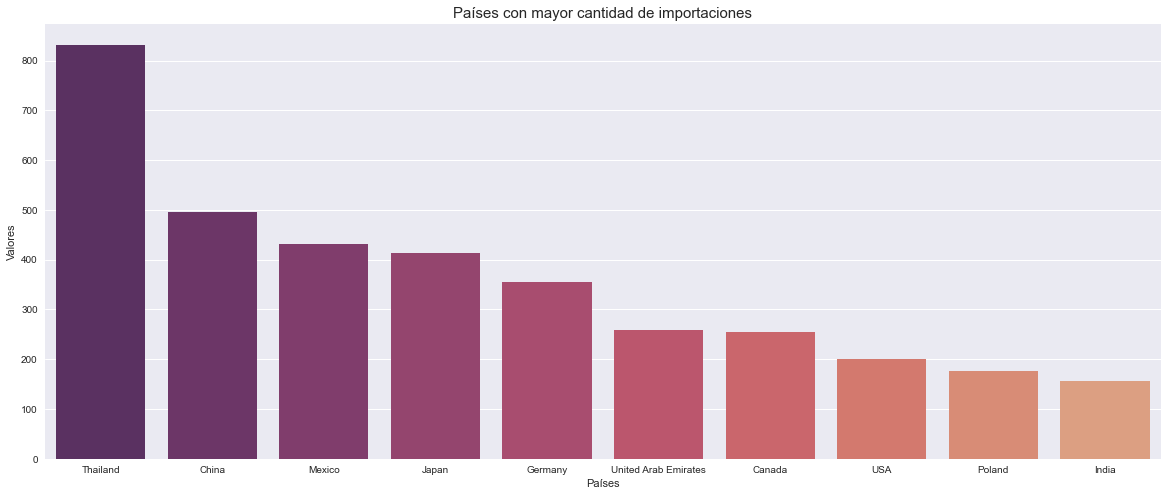

In [67]:
plt.figure(figsize=(20, 8))
sns.barplot(
    x = df_Imports_ranking.iloc[:10].index,
    y = df_Imports_ranking['Raiking'].iloc[:10],
    palette = paleta
)
plt.title('Países con mayor cantidad de importaciones', fontdict={'fontsize':15})
plt.xlabel('Países')
plt.ylabel('Valores')
plt.show()

En la gráfica 2 se puede notar que Thailandia, China y México son los tres países con mayor numero de importaciones. Se puede interpretar como los tres mejores clientes importadores.

## Gráfica 3: Países con mayor cantidad de exportaciones

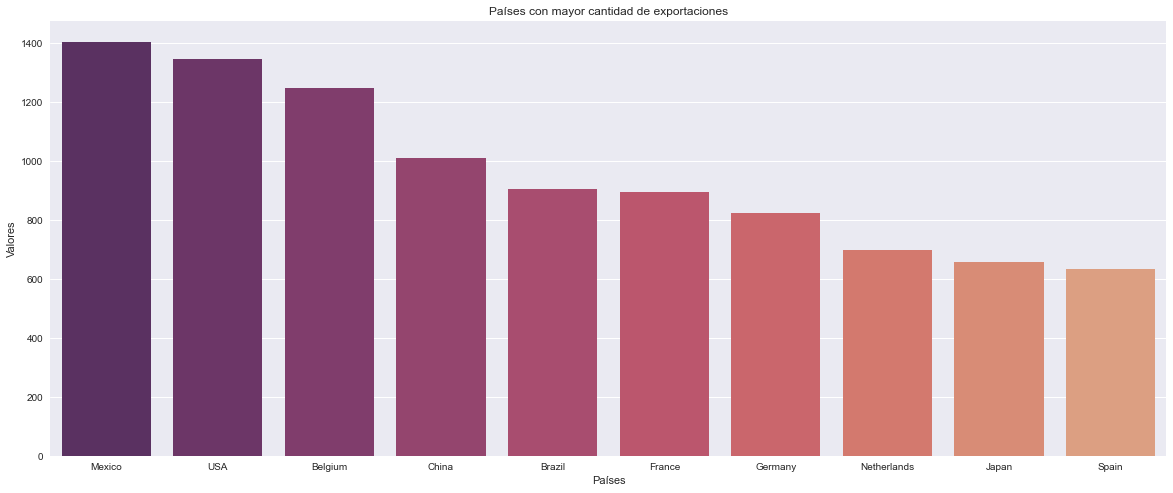

In [68]:
plt.figure(figsize=(20,8))
sns.barplot(
    x = df_Exports_ranking.iloc[:10].index, 
    y = df_Exports_ranking['Raiking'].iloc[:10], 
    palette=paleta
)
plt.title('Países con mayor cantidad de exportaciones')
plt.xlabel('Países')
plt.ylabel('Valores')
plt.show()

Por otro lado, México, USA y Bélgica son países con altos niveles de exportación al resto del mundo. So por lo tanto los tres mejores exportadores.

## Mejores rutas (origen - destino)

### Orígenes con mayor cantidad de nodos

Para este apartado se filtran a través de dos funciones (**rutas_total** y **rutas_destination**) las cuales ayudan a conocer cuantas veces se menciona una ruta en el **df**. La información se segmenta en:


- **Orígenes (países) con mayor cantidad de nodos**: Aquellos países que cuentan con mayor cantidad de relaciones comerciales con otras naciones
- **Mejores rutas comerciales**: Que contiene las mejores rutas tanto para importaciones como exportaciones
- **Mejores rutas comerciales (importaciones)**: Con las mejores rutas solo para importaciones
- **Mejores rutas comerciales (exportaciones)**: Con las mejores rutas solo para exportaciones


In [69]:
def rutas_total(pais_origen):
    y = []
    [y.append(df[(df['origin'] == pais_origen) & (df['destination'] == pais_destino)].destination.count()) for pais_destino in df['destination'].unique()]
    return y

def rutas_destination(pais_origen, direccion):
    y = []
    [y.append(df[(df['origin'] == pais_origen) & (df['destination'] == pais_destino) & (df['direction'] == direccion)].destination.count()) for pais_destino in df['destination'].unique()]
    return y

DataFrame similar a una matriz en donde cada nombre de columna representa un origen y cada celda (índex) representa el sentido, de modo que el número que relaciona tanto la columna como la celda es el número de veces que esa ruta (origen - destino) aparece en la base de datos general.

In [70]:
y = []
final = []
for pais_origen in df['origin'].unique():
    y = rutas_total(pais_origen=pais_origen)
    final.append(y)
df_rutas_total = pd.DataFrame(final, columns=df['destination'].unique(), index=df['origin'].unique())
df_rutas_total = df_rutas_total.transpose()
df_rutas_total.head()

,Japan,Germany,China,Italy,USA,Russia,South Korea,Netherlands,France,Canada,...,United Kingdom,Australia,Brazil,Switzerland,Mexico,Austria,Singapore,Vietnam,Malaysia,United Arab Emirates
China,196,328,0,0,79,130,94,0,72,103,...,0,0,195,0,100,0,23,0,0,0
USA,140,236,126,58,0,0,77,0,103,161,...,122,0,46,0,228,48,106,0,0,0
South Korea,62,144,189,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Spain,15,0,250,75,0,0,0,0,116,0,...,176,0,0,0,0,0,0,0,0,0
Italy,0,130,0,0,0,0,0,0,23,0,...,100,0,0,45,0,98,0,0,0,0


## Gráfica 4: Origenes con mayor cantidad de nodos

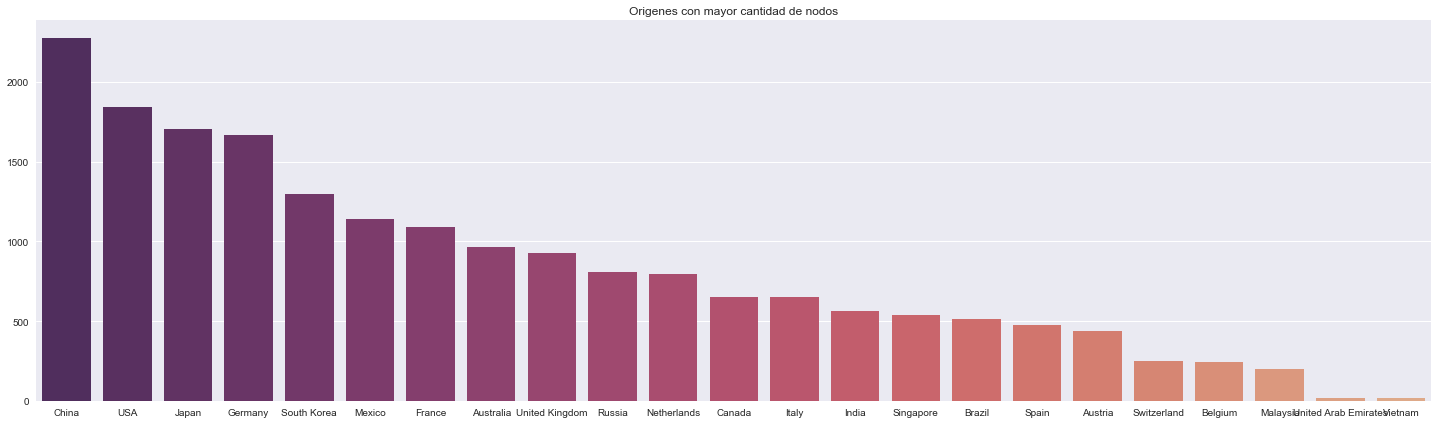

In [71]:
plt.style.use('seaborn')
plt.figure(figsize=(25,7))
sns.barplot(x = df_rutas_total.sum().sort_values(ascending = False).index, y = df_rutas_total.sum().sort_values(ascending = False), palette='flare_r')
plt.title('Origenes con mayor cantidad de nodos')
plt.show()

### Gráfica 4.1: Origenes con mayor cantidad de nodos (Importaciones)

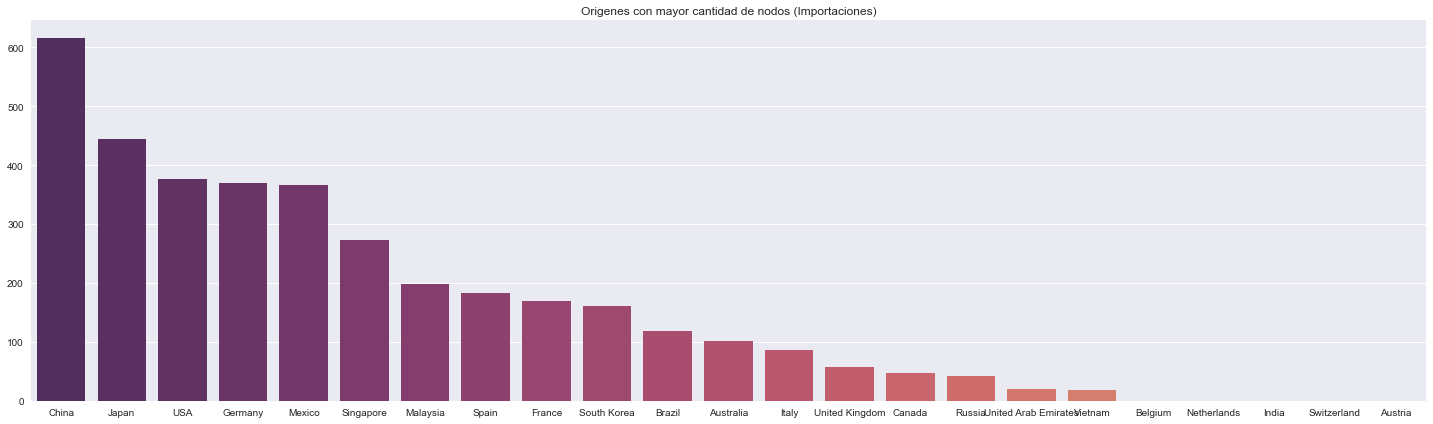

In [72]:
y = []
final = []
for pais_origen in df['origin'].unique():
    y = rutas_destination(pais_origen=pais_origen, direccion='Imports')
    final.append(y)
df_rutas_importaciones = pd.DataFrame(final, columns=df['destination'].unique(), index=df['origin'].unique())
df_rutas_importaciones = df_rutas_importaciones.transpose()
plt.style.use('seaborn')
plt.figure(figsize=(25,7))
sns.barplot(x = df_rutas_importaciones.sum().sort_values(ascending = False).index, y = df_rutas_importaciones.sum().sort_values(ascending = False), palette='flare_r')
plt.title('Origenes con mayor cantidad de nodos (Importaciones)')
plt.show()

### Gráfica 4.2: Origenes con mayor cantidad de nodos (Exportaciones)

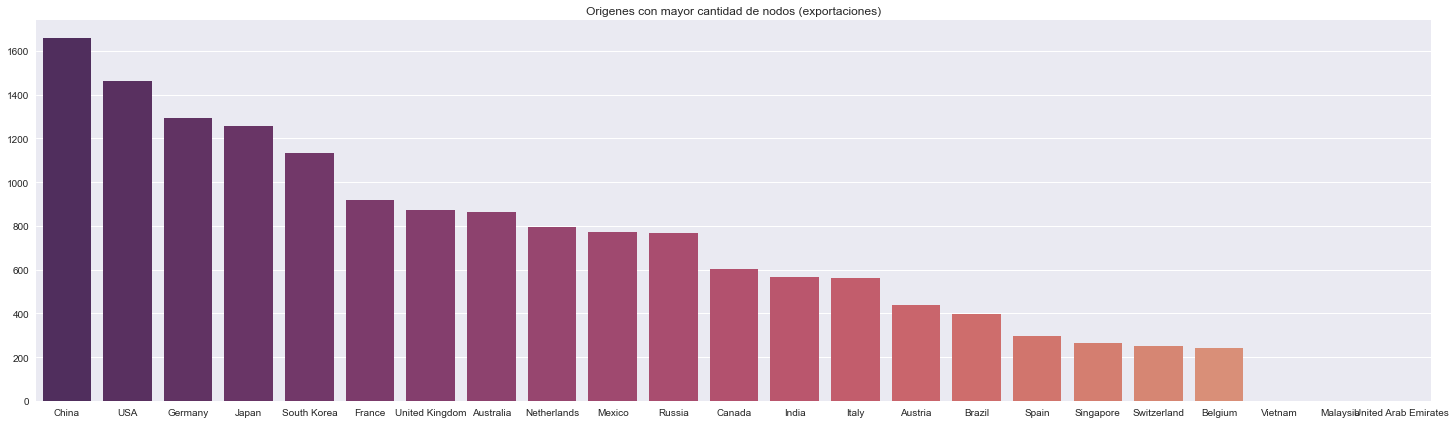

In [73]:
y = []
final = []
for pais_origen in df['origin'].unique():
    y = rutas_destination(pais_origen=pais_origen, direccion='Exports')
    final.append(y)
df_rutas_exportaciones = pd.DataFrame(final, columns=df['destination'].unique(), index=df['origin'].unique())
df_rutas_exportaciones = df_rutas_exportaciones.transpose()
plt.style.use('seaborn')
plt.figure(figsize=(25,7))
sns.barplot(x = df_rutas_exportaciones.sum().sort_values(ascending = False).index, y = df_rutas_exportaciones.sum().sort_values(ascending = False), palette='flare_r')
plt.title('Origenes con mayor cantidad de nodos (exportaciones)')
plt.show()

## Top Rutas

Uso del mismo algoritmo anterior para calcular cuales son las rutas (Origen - Destino) mas populares

### Gráfica 5: Mejores rutas comerciales

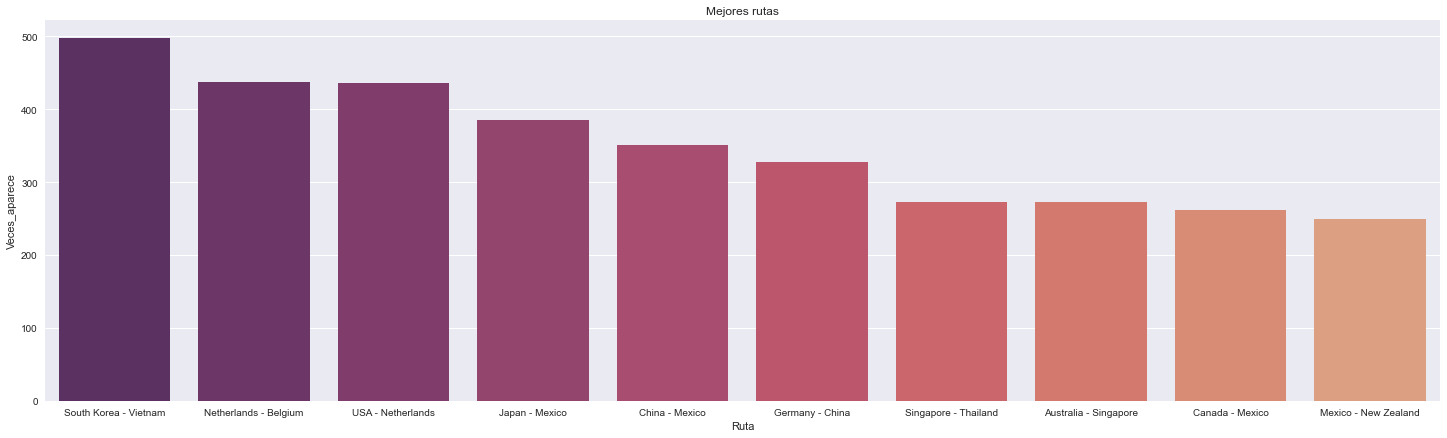

In [74]:
y = []
for pais in df_rutas_total.columns:
    y.append([f"{pais} - {df_rutas_total[pais].sort_values(ascending = False).index[0]}", df_rutas_total[pais].sort_values(ascending = False).max()])
df_mejoresr_total = pd.DataFrame(y, columns=['Ruta', 'Veces_aparece'])
df_mejoresr_total.set_index('Ruta', inplace = True)
df_mejoresr_total.sort_values(by = 'Veces_aparece', ascending = False, inplace = True)
plt.figure(figsize=(25,7))
sns.barplot(x = df_mejoresr_total.iloc[:10].index, y = df_mejoresr_total['Veces_aparece'].iloc[:10], palette='flare_r')
plt.title('Mejores rutas')
plt.show()

### Gráfica 5.1: Mejores rutas (Importaciones)

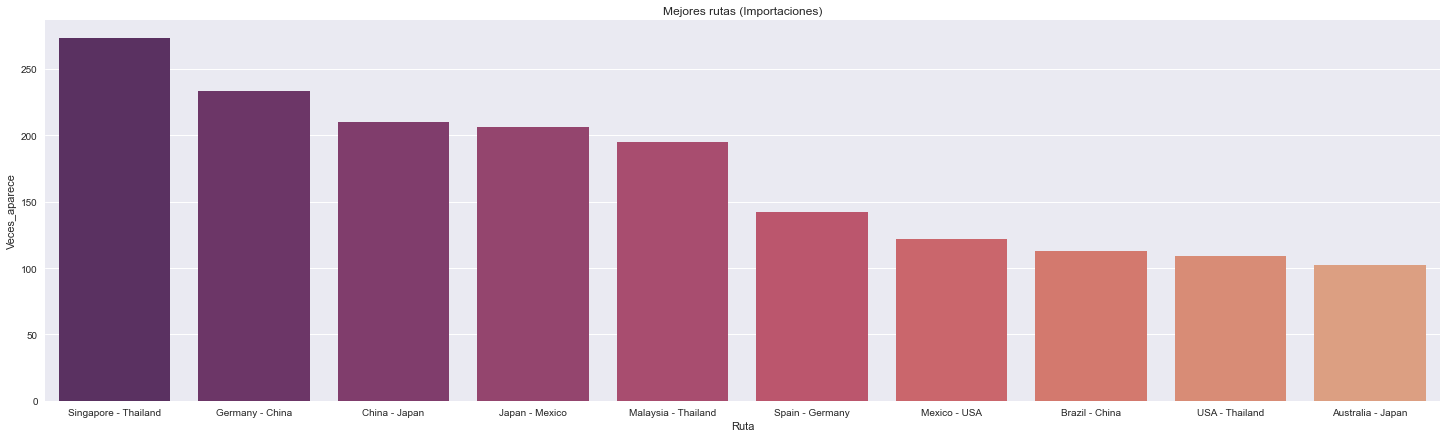

In [75]:
y = []
for pais in df_rutas_total.columns:
    y.append([f"{pais} - {df_rutas_importaciones[pais].sort_values(ascending = False).index[0]}", df_rutas_importaciones[pais].sort_values(ascending = False).max()])
df_mejoresr_importaciones = pd.DataFrame(y, columns=['Ruta', 'Veces_aparece'])
df_mejoresr_importaciones.set_index('Ruta', inplace = True)
df_mejoresr_importaciones.sort_values(by = 'Veces_aparece', ascending = False, inplace = True)
plt.figure(figsize=(25,7))
sns.barplot(x = df_mejoresr_importaciones.iloc[:10].index, y = df_mejoresr_importaciones['Veces_aparece'].iloc[:10], palette='flare_r')
plt.title('Mejores rutas (Importaciones)')
plt.show()

### ### Gráfica 5.2: Mejores rutas (Exportaciones)

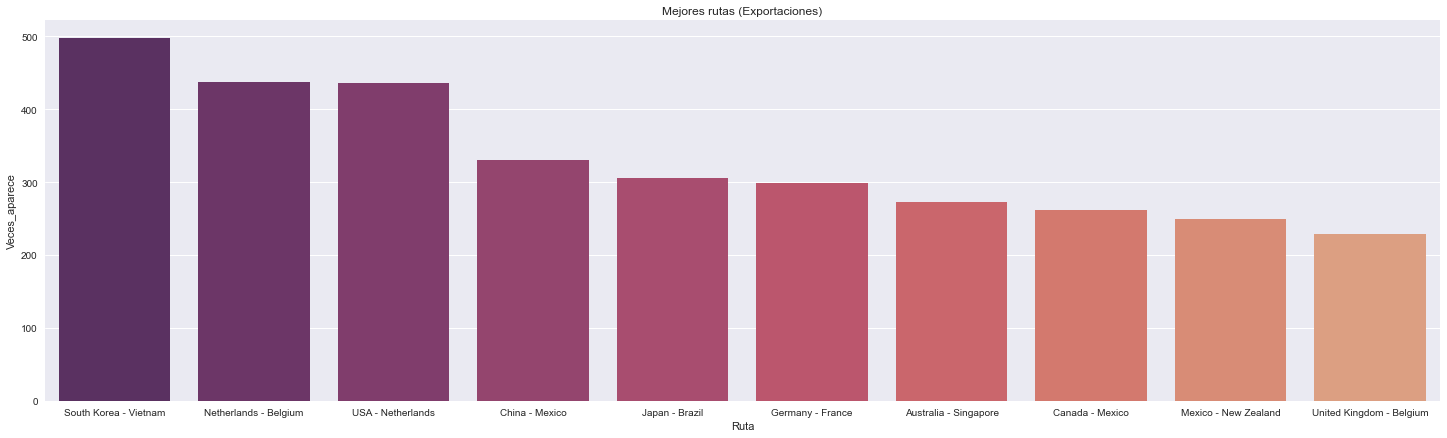

In [76]:
y = []
for pais in df_rutas_total.columns:
    y.append([f"{pais} - {df_rutas_exportaciones[pais].sort_values(ascending = False).index[0]}", df_rutas_exportaciones[pais].sort_values(ascending = False).max()])
df_mejoresr_exportaciones = pd.DataFrame(y, columns=['Ruta', 'Veces_aparece'])
df_mejoresr_exportaciones.set_index('Ruta', inplace = True)
df_mejoresr_exportaciones.sort_values(by = 'Veces_aparece', ascending = False, inplace = True)
plt.figure(figsize=(25,7))
sns.barplot(x = df_mejoresr_exportaciones.iloc[:10].index, y = df_mejoresr_exportaciones['Veces_aparece'].iloc[:10], palette='flare_r')
plt.title('Mejores rutas (Exportaciones)')
plt.show()

# Transportes mas usados

## Filtrado de información para los transportes mas usados

Se realiza una doble *filtración por bucle for* debido a que se requiere separar los medios de transporte más usados en importaciones y exportaciones 

In [77]:
array_trans_raiking = []
for country in df['transport_mode'].unique():
    imports = df[(df['transport_mode'] == country) & (df['direction'] == 'Imports')].direction.count()
    exports = df[(df['transport_mode'] == country) & (df['direction'] == 'Exports')].direction.count()
    array_trans_raiking.append([country, [imports, exports]])
print(array_trans_raiking)

[['Sea', [2254, 8434]], ['Air', [344, 2045]], ['Rail', [601, 2780]], ['Road', [449, 2149]]]


Creación y ordenamiento del DataFrame generado a partir de las listas que el buble anterior produjo

In [78]:
df_trans_mas_usados = pd.DataFrame(dict(array_trans_raiking), index=['Importaciones', 'Exportaciones']).transpose()
display(df_trans_mas_usados)

,Importaciones,Exportaciones
Sea,2254,8434
Air,344,2045
Rail,601,2780
Road,449,2149


Se hace un segundo *filtrado por bucle for* debido a que no solo se mostrarán los medios de transporte más usados, sino los que transportan mayor valor de mercancías. Por lo tanto, se hace un mismo filtrado, pero ahora con las sumas de los valores que cada medio de transporte lleva de un destino a otro.

In [79]:
array_top_tran_x = []
array_top_tran_m = []
for trans_mode in df['transport_mode'].unique():
    array_top_tran_x.append([trans_mode, df[(df['transport_mode'] == trans_mode) & (df['direction'] == 'Exports')].total_value.sum()])
    array_top_tran_m.append([trans_mode, df[(df['transport_mode'] == trans_mode) & (df['direction'] == 'Imports')].total_value.sum()])

print(array_top_tran_m)
print(array_top_tran_x)

[['Sea', 34938000000], ['Air', 5477000000], ['Rail', 9123000000], ['Road', 5990000000]]
[['Sea', 65592622000], ['Air', 32785147000], ['Rail', 34505043000], ['Road', 27280486000]]


En seguida, la creación del DataFrame y su ordenamiento

In [80]:
series1 = pd.Series(dict(array_top_tran_m), name = 'Total_Importaciones')
series2 = pd.Series(dict(array_top_tran_x), name = 'Total_Exportaciones')
df_trans_value = pd.concat([series1, series2], axis=1)
display(df_trans_value)

,Total_Importaciones,Total_Exportaciones
Sea,34938000000,65592622000
Air,5477000000,32785147000
Rail,9123000000,34505043000
Road,5990000000,27280486000


## Gráfica 6: Medios de transporte mas demandados (importaciones)

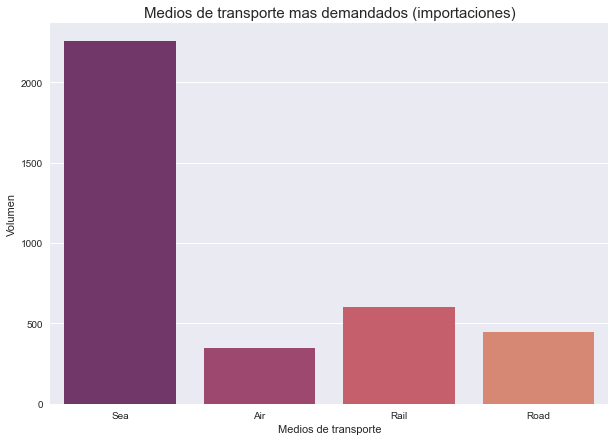

In [81]:
plt.figure(figsize=(10,7))
sns.barplot(
    x = df_trans_mas_usados.index, 
    y = df_trans_mas_usados['Importaciones'],
    palette = paleta
    )
plt.title('Medios de transporte mas demandados (importaciones)',  fontdict = {'fontsize' : 15})
plt.xlabel('Medios de transporte')
plt.ylabel('Volumen')
plt.show()

En la gráfica 6 se pueden notar los medios de transporte más usados en importaciones en las rutas que **Synergy Logistics** administra.

## Gráfica 7: Medios de transporte mas demandados (exportaciones)

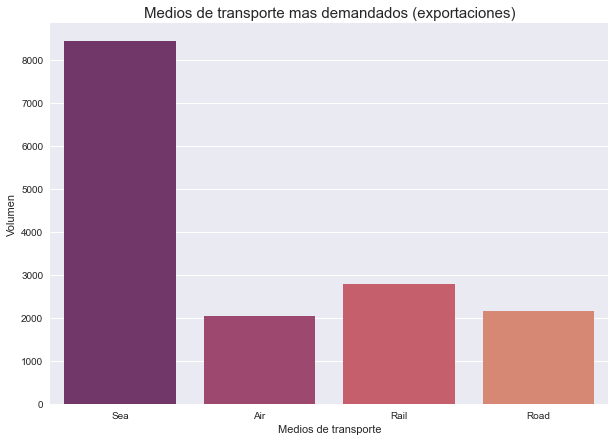

In [82]:
plt.figure(figsize=(10,7))
sns.barplot(
    x = df_trans_mas_usados.index, 
    y = df_trans_mas_usados['Exportaciones'],
    palette = paleta
    )
plt.title('Medios de transporte mas demandados (exportaciones)',  fontdict = {'fontsize' : 15})
plt.xlabel('Medios de transporte')
plt.ylabel('Volumen')
plt.show()

En la gráfica 7 se pueden notar que el transporte marítimo y ferrocarrilero al igual que en la gráfica 4 son los medios de transporte más demandados por concepto de exportación en las rutas de **Synergy Logistics**.

## Gráfica 8: Medios de transporte mas demandados según valor del producto (importaciones)

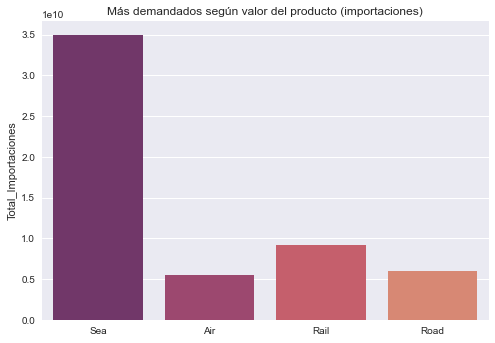

In [83]:
sns.barplot(
    x = df_trans_value.index, 
    y = df_trans_value['Total_Importaciones'],
    palette= paleta
)
plt.title('Más demandados según valor del producto (importaciones)')
plt.show()

En la gráfica 8 se puede notar que tomando en cuenta el valor de la mercancía transportada, la mayoría de los bienes se transportan por mar, seguido del ferrocarril por concepto de importaciones

## Gráfica 9: Medios de transporte mas demandados según valor del producto (exportaciones)

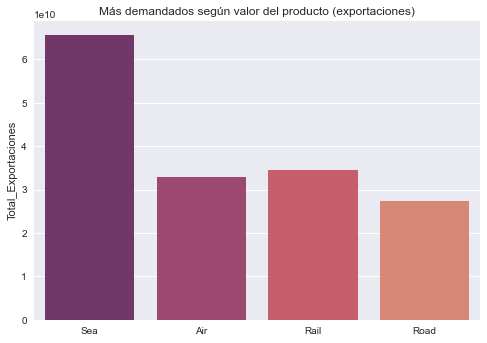

In [84]:
sns.barplot(
    x = df_trans_value.index, 
    y = df_trans_value['Total_Exportaciones'], 
    palette = paleta
)
plt.title('Más demandados según valor del producto (exportaciones)')
plt.show()

Al igual que en la gráfica 8, la gráfica 9 muestra que los productos según su valor son mayormente transportados por mar y ferrocarril dentro del concepto de exportaciones.

## Gráfica 10: Transportes mas demandados por año

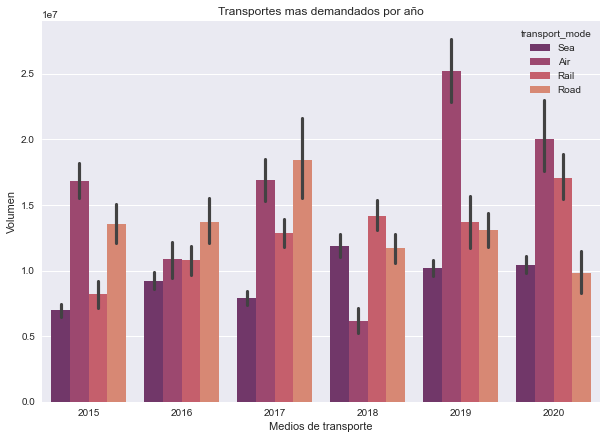

In [85]:
plt.figure(figsize=(10,7))
sns.barplot( 
    x = df['year'],
    y = df['total_value'], 
    hue = df['transport_mode'],
    palette=paleta
    )
plt.title('Transportes mas demandados por año')
plt.xlabel('Medios de transporte')
plt.ylabel('Volumen')
plt.show()

Es relevante conocer cuál ha sido entonces el comportamiento histórico de la demanda de medios de transporte comercial. En la gráfica 10 se puede observar como el medio aéreo tiene prevalencia desde el 2015 hasta el 2020 seguida por el ferrocarril en cuanto al valor de las mercancías transportadas.

# Países que mas importan y exportan

## Filtrado de información para países que mas importan y exportan

Se utiliza un *filtrado por bucle for* con dos condiciones para obtener a cada uno de los países que más importan y exportan dependiendo del valor total de los productos.

In [86]:
# Filtrado para países que mas importan
array_pais_importacion = []
[array_pais_importacion.append([country, df[(df['destination'] == country) & (df['direction'] == 'Imports')].total_value.sum()]) for country in df['destination'].unique()]
print(array_pais_importacion)

[['China', 2572000000], ['USA', 3758000000], ['South Korea', 0], ['Spain', 0], ['Italy', 0], ['Japan', 5828000000], ['Germany', 5109000000], ['Mexico', 8894000000], ['Brazil', 0], ['France', 0], ['Switzerland', 0], ['UK', 0], ['Croatia', 0], ['Ireland', 0], ['Belgium', 0], ['Argentina', 0], ['Singapore', 1516000000], ['Canada', 1052000000], ['Netherlands', 0], ['Belorussia', 0], ['Turkey', 0], ['India', 3018000000], ['Vietnam', 0], ['Russia', 0], ['United Arab Emirates', 7848000000], ['Thailand', 13745000000], ['Philippines', 0], ['Peru', 0], ['Austria', 0], ['New Zealand', 0], ['Rusia', 0], ['Slovakia', 0], ['Malaysia', 0], ['Poland', 2188000000]]


In [87]:
# Filtrado para países que mas exportan
array_pais_exportacion = []
[array_pais_exportacion.append([country, df[(df['destination'] == country) & (df['direction'] == 'Exports')].total_value.sum()]) for country in df['destination'].unique()]
print(array_pais_exportacion)

[['China', 11259992000], ['USA', 13159409000], ['South Korea', 7321668000], ['Spain', 5934191000], ['Italy', 6109329000], ['Japan', 8777152000], ['Germany', 11303451000], ['Mexico', 28315015000], ['Brazil', 7508016000], ['France', 5850549000], ['Switzerland', 840346000], ['UK', 8150673000], ['Croatia', 699000000], ['Ireland', 1147123000], ['Belgium', 13099380000], ['Argentina', 4860036000], ['Singapore', 2437127000], ['Canada', 2714779000], ['Netherlands', 3764239000], ['Belorussia', 3529000000], ['Turkey', 1446000000], ['India', 498000000], ['Vietnam', 6877007000], ['Russia', 1841219000], ['United Arab Emirates', 1037119000], ['Thailand', 337000000], ['Philippines', 344000000], ['Peru', 1673000], ['Austria', 1901000], ['New Zealand', 9382000], ['Rusia', 989046000], ['Slovakia', 258000], ['Malaysia', 218000], ['Poland', 0]]


In [88]:
# Filtrado para el comercio tanto para importaciones como exportaciones que un país tiene
array_pais_total = []
[array_pais_total.append([country, df[df['destination'] == country].total_value.sum()]) for country in df.destination.unique()]
print(array_pais_total)

[['China', 13831992000], ['USA', 16917409000], ['South Korea', 7321668000], ['Spain', 5934191000], ['Italy', 6109329000], ['Japan', 14605152000], ['Germany', 16412451000], ['Mexico', 37209015000], ['Brazil', 7508016000], ['France', 5850549000], ['Switzerland', 840346000], ['UK', 8150673000], ['Croatia', 699000000], ['Ireland', 1147123000], ['Belgium', 13099380000], ['Argentina', 4860036000], ['Singapore', 3953127000], ['Canada', 3766779000], ['Netherlands', 3764239000], ['Belorussia', 3529000000], ['Turkey', 1446000000], ['India', 3516000000], ['Vietnam', 6877007000], ['Russia', 1841219000], ['United Arab Emirates', 8885119000], ['Thailand', 14082000000], ['Philippines', 344000000], ['Peru', 1673000], ['Austria', 1901000], ['New Zealand', 9382000], ['Rusia', 989046000], ['Slovakia', 258000], ['Malaysia', 218000], ['Poland', 2188000000]]


Convertir cada una de las listas generadas a un df

In [89]:
series1 = pd.Series(dict(array_pais_exportacion), name='Exportaciones')
series2 = pd.Series(dict(array_pais_importacion), name = 'Importaciones')
series3 = pd.Series(dict(array_pais_total), name = 'Total')
df_paises_raiting = pd.concat([series1, series2, series3], axis=1)
display(df_paises_raiting)

,Exportaciones,Importaciones,Total
China,11259992000,2572000000,13831992000
USA,13159409000,3758000000,16917409000
South Korea,7321668000,0,7321668000
Spain,5934191000,0,5934191000
Italy,6109329000,0,6109329000
Japan,8777152000,5828000000,14605152000
Germany,11303451000,5109000000,16412451000
Mexico,28315015000,8894000000,37209015000
Brazil,7508016000,0,7508016000
France,5850549000,0,5850549000


## Gráfica 11: Países con mayor valor de importaciones

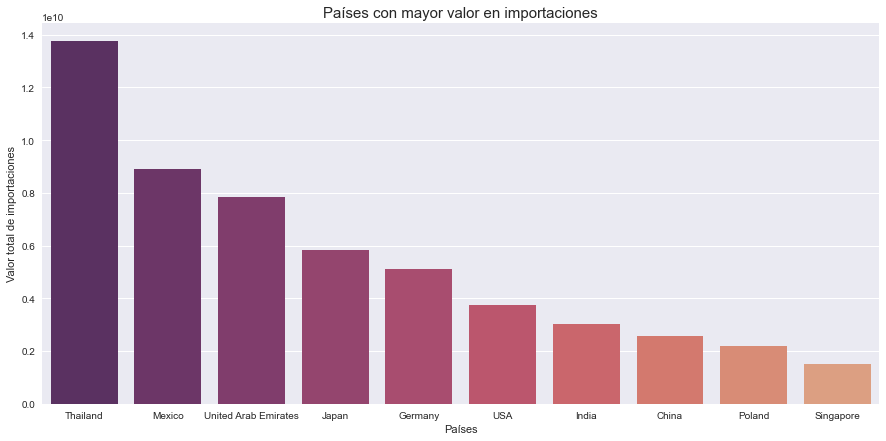

In [90]:
plt.figure(figsize=(15,7))
sns.barplot(
    x = df_paises_raiting.sort_values(by='Importaciones', ascending=False).iloc[:10].index, 
    y = df_paises_raiting.sort_values(by = 'Importaciones', ascending=False).iloc[:10].Importaciones,
    palette = paleta
)
plt.title('Países con mayor valor en importaciones', fontdict={'fontsize':15})
plt.xlabel('Países')
plt.ylabel('Valor total de importaciones')
plt.show()

Dentro de los países con mayor valor en sus importaciones encontramos nuevamente a Tailandia y México que junto con los Emiratos Árabes encabezan la lista, dejando a Singapur en último lugar.

## Gráfica 12: Países con mayor valor de Exportación 

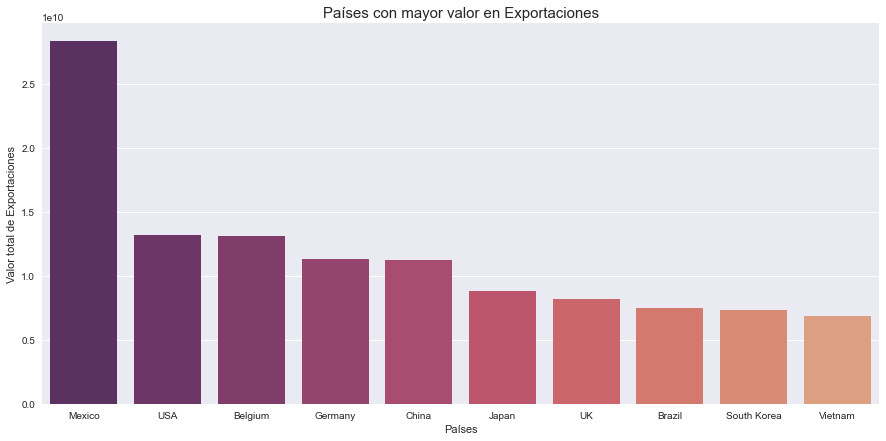

In [91]:
plt.figure(figsize=(15,7))
sns.barplot(
    x = df_paises_raiting.sort_values(by='Exportaciones', ascending=False).iloc[:10].index, 
    y = df_paises_raiting.sort_values(by = 'Exportaciones', ascending=False).iloc[:10].Exportaciones,
    palette = paleta
)
plt.title('Países con mayor valor en Exportaciones', fontdict={'fontsize':15})
plt.xlabel('Países')
plt.ylabel('Valor total de Exportaciones')
plt.show()

Así mismo, se observa en la gráfica 12 que México y Usa junto con Bélgica encabezan la lista como los países con mayor valor en sus importaciones dejando a Sur Corea al final de la lista solo por encima de Vietnam.

## Gráfica 13: Países con mayor valor en importaiones y exportaciones

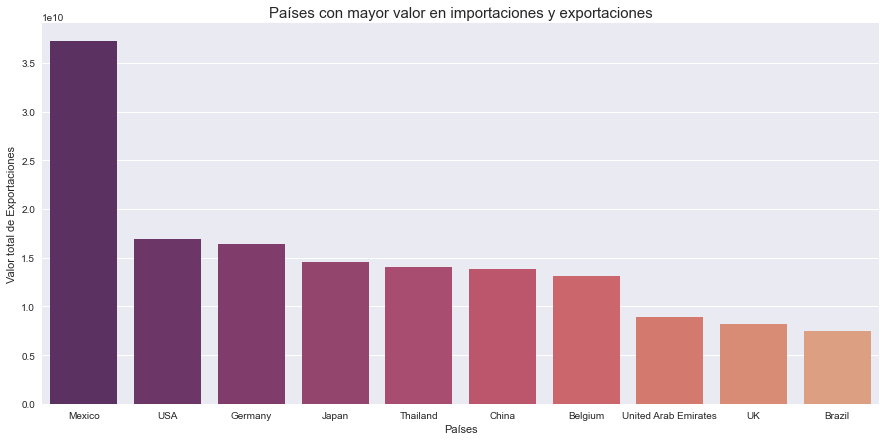

In [92]:
plt.figure(figsize=(15,7))
sns.barplot(
    x = df_paises_raiting.sort_values(by='Total', ascending=False).iloc[:10].index, 
    y = df_paises_raiting.sort_values(by = 'Total', ascending=False).iloc[:10].Total,
    palette = paleta
)
plt.title('Países con mayor valor en importaciones y exportaciones', fontdict={'fontsize':15})
plt.xlabel('Países')
plt.ylabel('Valor total de Exportaciones')
plt.show()

En total, los países con mayor valor en sus importaciones y exportaciones se encuentra México, USA y Alemania mostrando también que Brasil es la nación con menor valor en su comercio exterior.

# Análisis formal

## Mejores rutas comerciales

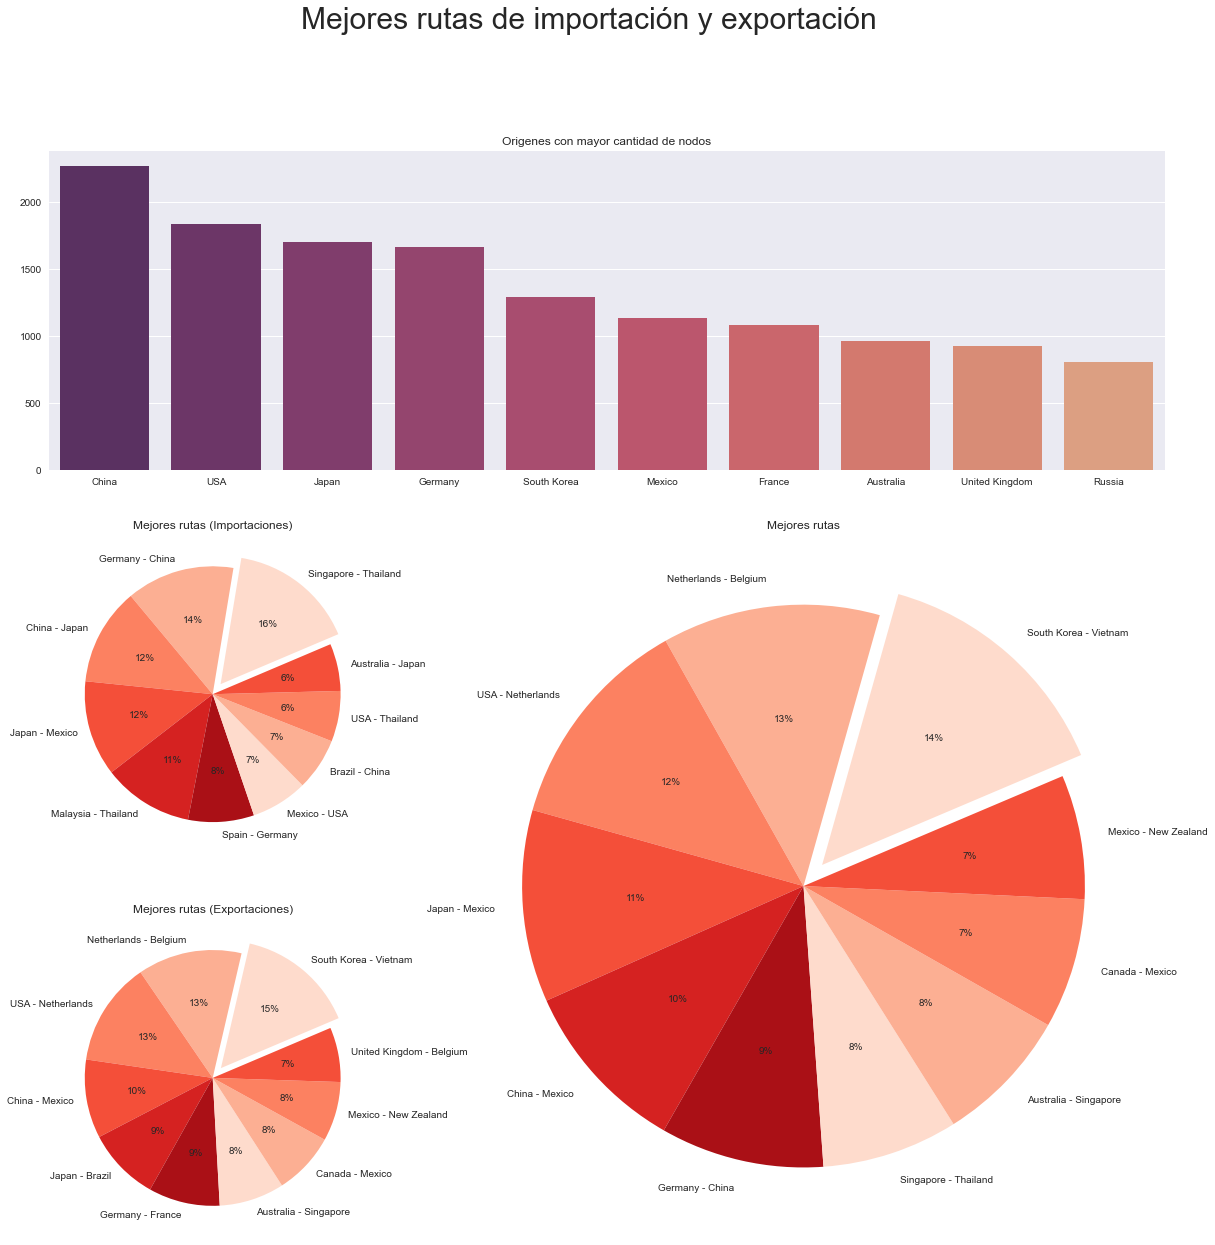

In [101]:
fig, ax = plt.subplots(figsize = (20,20))

ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), colspan=3)
ax2 = plt.subplot2grid(shape=(3,3), loc=(1,0))
ax3 = plt.subplot2grid(shape=(3,3), loc=(2,0))
ax4 = plt.subplot2grid(shape=(3,3), loc=(1,1), colspan=2, rowspan=2)

ax1 = sns.barplot(
    x = df_rutas_total.sum().sort_values(ascending = False).iloc[:10].index, 
    y = df_rutas_total.sum().sort_values(ascending = False).iloc[:10], palette='flare_r',
    ax=ax1 
    )
ax1.set_title('Origenes con mayor cantidad de nodos')

ax2.pie(
    labels = df_mejoresr_importaciones.iloc[:10].index, 
    x = df_mejoresr_importaciones['Veces_aparece'].iloc[:10], 
    colors = colors2, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0), 
    startangle = 23)
ax2.set_title('Mejores rutas (Importaciones)')   

ax3.pie(
    labels = df_mejoresr_exportaciones.iloc[:10].index, 
    x = df_mejoresr_exportaciones['Veces_aparece'].iloc[:10], 
    colors = colors2, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0), 
    startangle = 23)
ax3.set_title('Mejores rutas (Exportaciones)') 

ax4.pie(
    labels = df_mejoresr_total.iloc[:10].index, 
    x = df_mejoresr_total['Veces_aparece'].iloc[:10],
    colors = colors2, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0), 
    startangle = 23)
ax4.set_title('Mejores rutas')

plt.suptitle('Mejores rutas de importación y exportación', fontsize = 30)
plt.show()

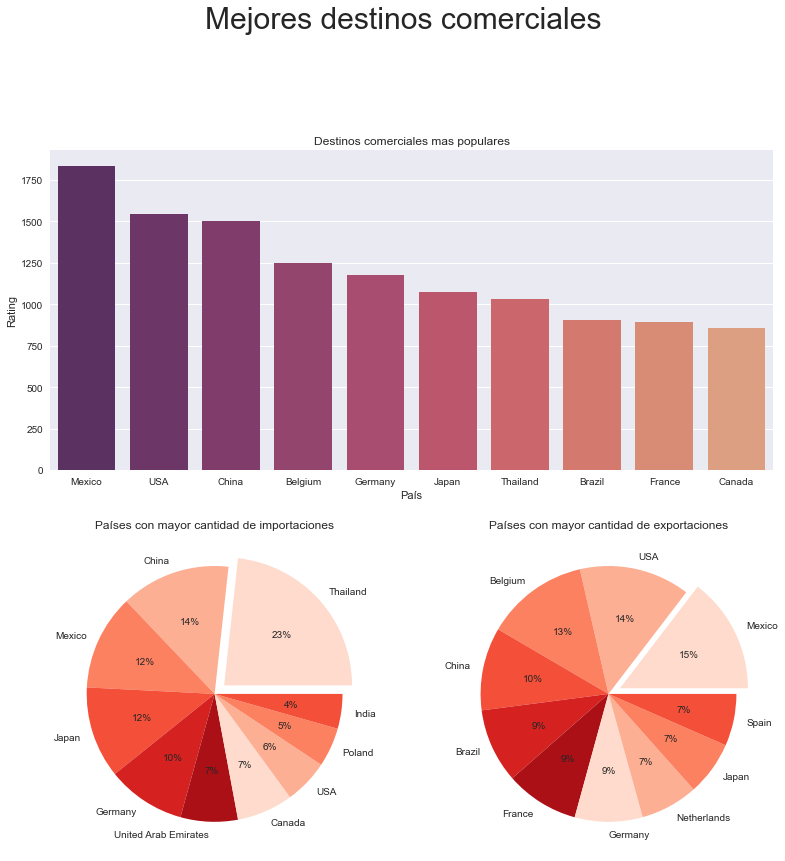

In [100]:
fig, ax = plt.subplots(figsize = (20,20))

ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), colspan=2)  
ax2 = plt.subplot2grid(shape=(3,3), loc=(1,0))
ax3 = plt.subplot2grid(shape=(3,3), loc=(1,1))

ax1 = sns.barplot(
    x = df_destinos.iloc[:10].index, 
    y = df_destinos['Rating'].iloc[:10],
    palette=paleta, ax=ax1
    )
ax1.set_title('Destinos comerciales mas populares')

ax2.pie(
    labels = df_Imports_ranking.iloc[:10].index, 
    x = df_Imports_ranking['Raiking'].iloc[:10], 
    colors = colors2, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
)
ax2.set_title('Países con mayor cantidad de importaciones')

ax3.pie(
    labels = df_Exports_ranking.iloc[:10].index, 
    x = df_Exports_ranking['Raiking'].iloc[:10], 
    colors = colors2, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
)
ax3.set_title('Países con mayor cantidad de exportaciones')

plt.suptitle('Mejores destinos comerciales', fontsize = 30, x = 0.37)
plt.show()

Elegir la estrategia número 1 significaría implementar una agresiva estrategia de inversión a las rutas de **China**, **Estados Unidos** y **Japón** debido a la cantidad de rutas y relaciones comerciales que tienen con diferentes naciones, esto es que los productos que estos tres países produzcan lleguen a más destinos. Adicionalmente, las rutas de estas tres naciones representan aproximadamente el 42% del total de las rutas que **Synergy Logistics** intermedia, con una participación del 56% en importaciones y 32% en exportaciones respectivamente. 

De hecho, **Estados Unidos** y **China** se encuentran dentro de los 5 mejores destinos comerciales al ser los más activos en cuanto a su comercio exterior con una participación de 32% en importaciones y 31% en exportaciones del total que **Synergy Logistics** opera diariamente.

El camino consistiría en potenciar las relaciones con Japón y Estados Unidos, pero sobre todo con China que no solo está en primer lugar con alrededor de 2200 nodos (rutas con otras naciones) sino que la ruta China - Japón y China - México juegan un papel estratégico y relevante en la ponderación de la intermediación que **Synergy Logistics** realiza.


## Medio de transporte utilizado

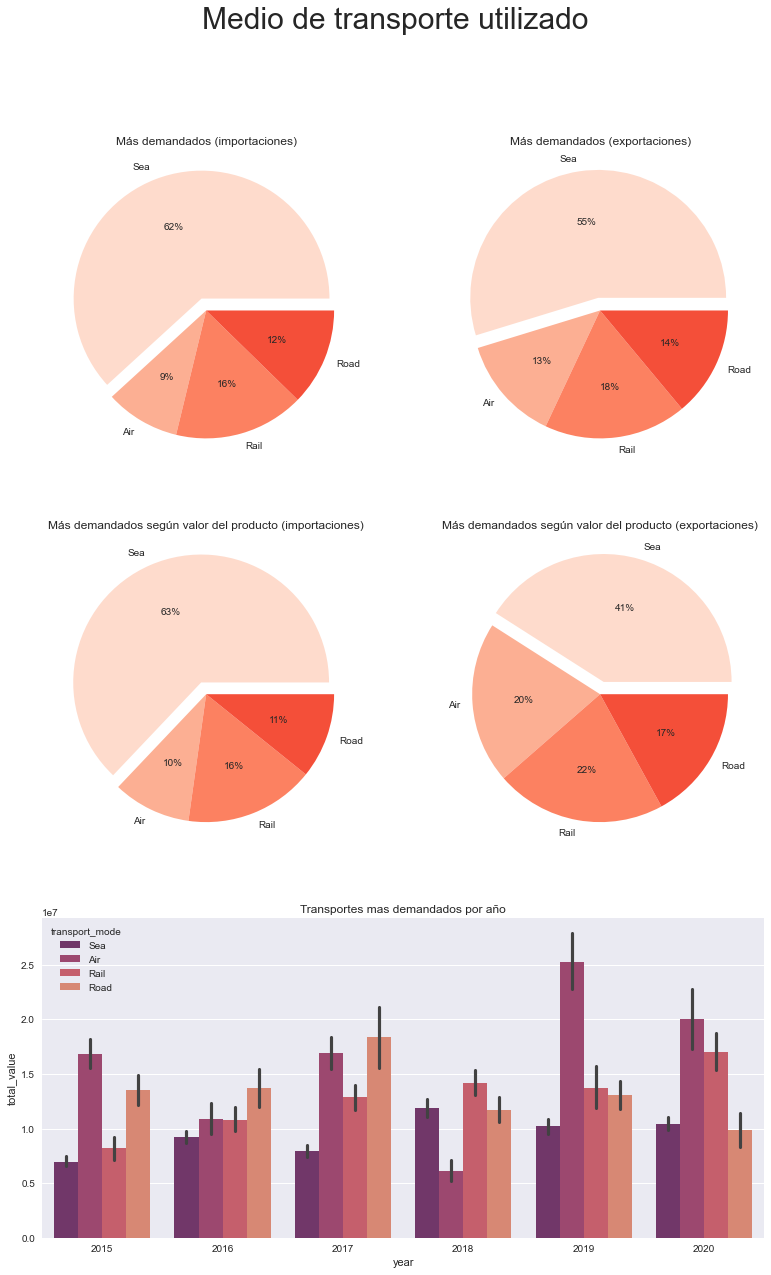

In [97]:
fig, ax = plt.subplots(figsize = (20, 20))

ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0))  
ax2 = plt.subplot2grid(shape=(3,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(3,3), loc=(1,0))
ax4 = plt.subplot2grid(shape=(3,3), loc=(1,1))
ax5 = plt.subplot2grid(shape=(3,3), loc=(2,0), colspan=2)

ax1.pie(
    labels = df_trans_mas_usados.index, 
    x = df_trans_mas_usados['Importaciones'],
    colors = colors2, autopct='%.0f%%', explode=(0.1, 0, 0, 0)
)
ax1.set_title('Más demandados (importaciones)')

ax2.pie(
    labels = df_trans_mas_usados.index, 
    x = df_trans_mas_usados['Exportaciones'],
    colors = colors2, autopct='%.0f%%', explode=(0.1, 0, 0, 0)
)
ax2.set_title('Más demandados (exportaciones)')

ax3.pie(
    labels = df_trans_value.index, 
    x = df_trans_value['Total_Importaciones'],
    colors = colors2, autopct='%.0f%%', explode=(0.1, 0, 0, 0)
)
ax3.set_title('Más demandados según valor del producto (importaciones)')

ax4.pie(
    labels = df_trans_value.index, 
    x = df_trans_value['Total_Exportaciones'], 
    colors = colors2, autopct='%.0f%%', explode=(0.1, 0, 0, 0)
)
ax4.set_title('Más demandados según valor del producto (exportaciones)')

ax5 = sns.barplot( 
    x = df['year'],
    y = df['total_value'], 
    hue = df['transport_mode'],
    palette=paleta
    )
ax5.set_title('Transportes mas demandados por año')

plt.suptitle("Medio de transporte utilizado", fontsize = 30, x = 0.37)
plt.show()

La segunda estrategia sugiere enfocar la atención en el medio de transporte marítimo ya que representa más del 50% de las operaciones de **Synergy Logistics** tanto en operaciones realizadas como en valor de productos transportados. Sin embargo, la evolución temporal refleja una tendencia decreciente y una naciente demanda por el transporte aéreo que juega un papel relevante al transportar el 20% del valor total en exportaciones. Esto es, que los productos más valiosos tienden a transportarse por aire debido a la eficiencia en tiempo y cuidado de las mercancías.

El camino que seguir consistiría en mantener una flotilla de barcos constante, pero enfocar las inversiones en el transporte aéreo (capacitación del personal y mejoramiento de la flotilla aérea) para hacer que la transición a este medio de transporte tenga un impacto cada vez menor a la estructura de **Synergy Logistics**.


## Valor total de importaciones y exportaciones

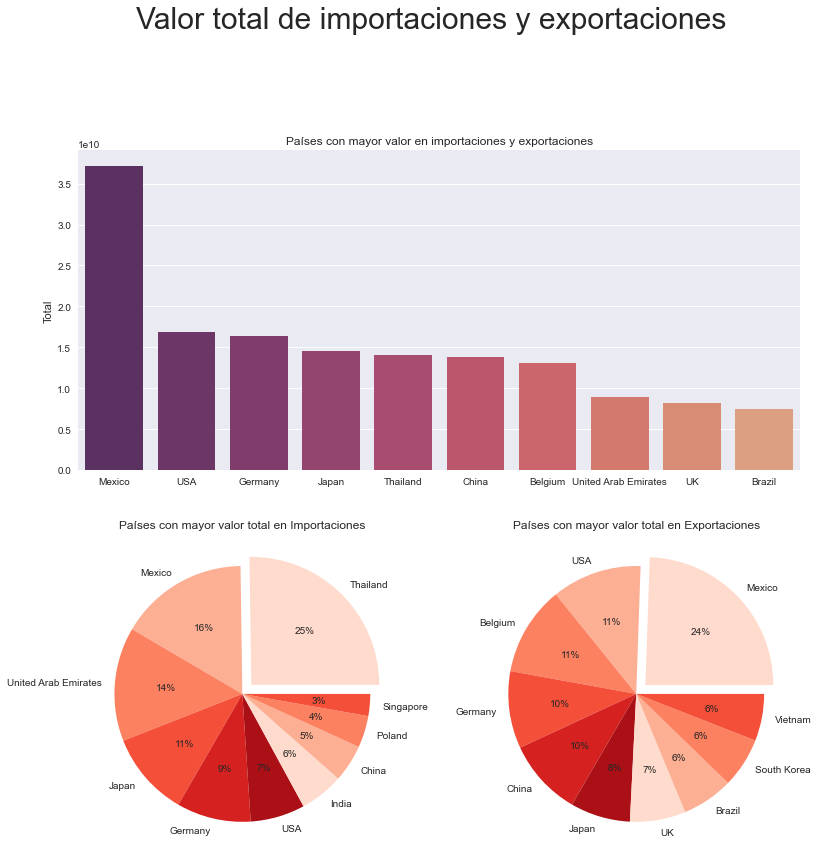

In [98]:
fig, ax = plt.subplots(figsize = (20, 20))


ax1 = plt.subplot2grid(shape=(3, 3), loc=(1, 0))
ax2 = plt.subplot2grid(shape=(3, 3), loc=(1, 1))
ax3 = plt.subplot2grid(shape=(3, 3), loc=(0, 0), colspan=2)


ax1.pie(
    labels = df_paises_raiting.sort_values(by='Importaciones', ascending=False).iloc[:10].index, 
    x = df_paises_raiting.sort_values(by = 'Importaciones', ascending=False).iloc[:10].Importaciones, 
    colors = colors2, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
    )
ax1.set_title('Países con mayor valor total en Importaciones')

ax2.pie(
    labels = df_paises_raiting.sort_values(by='Exportaciones', ascending=False).iloc[:10].index, 
    x = df_paises_raiting.sort_values(by = 'Exportaciones', ascending=False).iloc[:10].Exportaciones, 
    colors = colors2, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
    )
ax2.set_title('Países con mayor valor total en Exportaciones')

ax3 = sns.barplot(
    x = df_paises_raiting.sort_values(by='Total', ascending=False).iloc[:10].index, 
    y = df_paises_raiting.sort_values(by = 'Total', ascending=False).iloc[:10].Total,
    palette = paleta
    )   
ax3.set_title('Países con mayor valor en importaciones y exportaciones')


plt.suptitle('Valor total de importaciones y exportaciones', fontsize = 30, x = 0.37)
plt.show()

Finalmente, la estrategia tres consiste en elegir a México como una nación objetivo debido a que sus exportaciones representan al rededor del 25% del valor total en exportaciones y más del 15% en importaciones de mercancías que **Synergy Logistics** monitorea. Sin embargo, Añadir a Alemania, Japón y Tailandia a la lista de naciones de interés lograría tener más del 60% del valor en importaciones y al rededor del 42% en exportaciones.



# Conclusión

Dados los resultados del análisis, se concluye que la mejor estrategia es la primera que se enfoca en las rutas de importación y exportación más relevantes ya que abre un abanico de oportunidades al dirigir flujos de inversión a aquellas naciones que tienen más poder en los mercados extranjeros y desarrollado su política comercial para permitirles establecer mejores relaciones comerciales con más países que el resto de las naciones que **Synergy Logistics** monitorea e intermedia. De hecho, haciendo sincronía con las estrategias dos y tres se puede recomendar (además de fortalecer las relaciones con China, Estados Unidos y Japón) es mejorar la capacidad de la flotilla aérea debido a su tendencia ascendente y poca competencia respectiva. Finalmente, se puede complementar Añadiendo a México como aliado estratégico ya que su capacidad para comerciar mercancías con valor al rededor del 26% del total en mercado potenciaría el desarrollo de **Synergy Logistics** y su área en los mercados consiguiendo prestigio y fortaleciendo la confianza de socios e inversionistas potenciales.